# Stage 09 — Homework Starter Notebook

In the lecture, we learned how to create engineered features. Now it’s your turn to apply those ideas to your own project data.

In [1]:
import pandas as pd
import numpy as np

# Example synthetic data (replace with your project dataset)
np.random.seed(0)
n = 100
df = pd.DataFrame({
    'income': np.random.normal(60000, 15000, n).astype(int),
    'monthly_spend': np.random.normal(2000, 600, n).astype(int),
    'credit_score': np.random.normal(680, 50, n).astype(int)
})
df.head()

,income,monthly_spend,credit_score
0,86460,3129,661
1,66002,1191,668
2,74681,1237,734
3,93613,2581,712
4,88013,1296,712


## TODO: Implement at least 2 engineered features here

In [2]:
# Example template:
eng = df.copy()
eng['monthly_income'] = eng['income'] / 12
eng['spend_income_ratio'] = df['monthly_spend'] / eng['monthly_income']
eng['leftover'] = eng['monthly_income'] - eng['monthly_spend']

eng

,income,monthly_spend,credit_score,monthly_income,spend_income_ratio,leftover
0,86460,3129,661,7205.000000,0.434282,4076.000000
1,66002,1191,668,5500.166667,0.216539,4309.166667
2,74681,1237,734,6223.416667,0.198765,4986.416667
3,93613,2581,712,7801.083333,0.330851,5220.083333
4,88013,1296,712,7334.416667,0.176701,6038.416667
...,...,...,...,...,...,...
95,70598,1897,736,5883.166667,0.322445,3986.166667
96,60157,2463,684,5013.083333,0.491314,2550.083333
97,86788,2494,709,7232.333333,0.344840,4738.333333
98,61903,3297,660,5158.583333,0.639129,1861.583333


In [3]:
bins = [0,580,670,740,800,900]
labels = ['poor','fair','good','very_good','excellent']
eng['score_band'] = pd.cut(eng['credit_score'], bins=bins, labels=labels, right=False)
eng

,income,monthly_spend,credit_score,monthly_income,spend_income_ratio,leftover,score_band
0,86460,3129,661,7205.000000,0.434282,4076.000000,fair
1,66002,1191,668,5500.166667,0.216539,4309.166667,fair
2,74681,1237,734,6223.416667,0.198765,4986.416667,good
3,93613,2581,712,7801.083333,0.330851,5220.083333,good
4,88013,1296,712,7334.416667,0.176701,6038.416667,good
...,...,...,...,...,...,...,...
95,70598,1897,736,5883.166667,0.322445,3986.166667,good
96,60157,2463,684,5013.083333,0.491314,2550.083333,good
97,86788,2494,709,7232.333333,0.344840,4738.333333,good
98,61903,3297,660,5158.583333,0.639129,1861.583333,fair


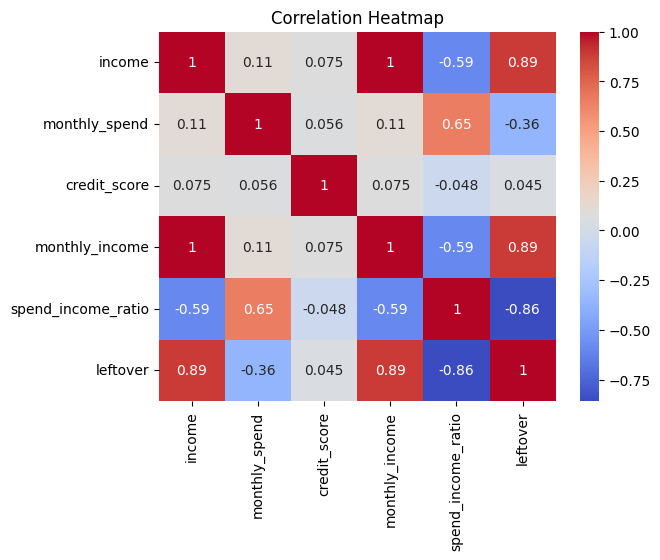

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.heatmap(eng.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Rationale for features
1. spend_income_ratio
   - The ratio normalizes spending by capacity. It mainly indicates affordability / stress. Two customers with different incomes but the same raw spend are not equally risky.
2. leftover
   - Leftover is the absolute buffer of how many dollars remain after typical spending. It captures resilience to shocks and liquidity.
3. score_band
   - Scores are converted from continuous data into categorical order. Credit systems and policies are thresholded, and improvements near key cutoffs change outcomes.